# Разработка стратегии

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("/mnt/process_data/process/research/experiments/finam-market-data-processing/SBER_PROCESSED_MARKET_DATA.csv", parse_dates=["Timestamp"], index_col="Timestamp", usecols=["Close", "Timestamp"])

In [19]:
data.head()

,Close
Timestamp,
2007-07-20 10:31:00,109.00
2007-07-20 10:32:00,109.99
2007-07-20 10:33:00,109.98
2007-07-20 10:34:00,110.90
2007-07-20 10:35:00,111.00


In [18]:
data = data[data.Close < 50000]

In [26]:
data["SMA50D"] = data["Close"].rolling(window="50d").mean()
data["SMA20D"] = data["Close"].rolling(window="20d").mean()

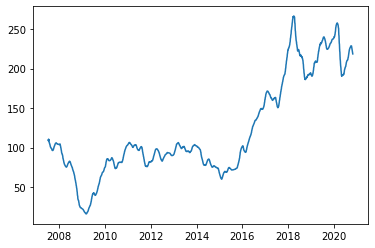

In [28]:
plt.plot(data["SMA50D"])

In [31]:
import datetime

In [35]:
position = None
position_open_log = []
position_close_log = []
position_result_log = []
for idx, row in data.iterrows():
    # открытие позиции
    if position is None:
        prev = data.index.get_loc(idx)-1
        if data.iloc[prev]["SMA20D"] < data.iloc[prev]["SMA50D"]:
            if row["SMA20D"] >= row["SMA50D"]:
                position = row["Close"]
                position += position * 0.0005 # dealer tax
                position_open_log.append(row.index)
    # закрытие позиции
    if position is not None:
        # TP
        if row["Close"] >= position*1.05:
            
            position_close_log.append(row.index)
            position_result_log.append(row["Close"] - position)
            position = None
            continue
        # SL
        if row["Close"] <= position*0.99:
            
            position_close_log.append(row.index)
            position_result_log.append(row["Close"] - position)
            position = None
            continue


TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

In [ ]:
sum(position_result_log)